# Singapore Weather Analysis

This script performs an analysis on the monthly rainfall and monthly surface air temperature. 

Loading required libraries:

In [2]:
import pandas as pd
import seaborn as sns

Loading required data:

In [3]:
rain = pd.read_csv('rainfall-monthly-total.csv')
temp = pd.read_csv('surface-air-temperature-monthly-mean.csv')

## Contents
- [Preparing the data](#Preparing-the-data)
- [Histograms of weather data](#Histograms-of-weather-data)
- [Monthly trends](#Monthly-trends)
- [Yearly trends](#Yearly-trends)
- [Relationship between temperature and rainfall](#Relationship-between-temperature-and-rainfall)
- [Conclusions](#Conclusions)

## Preparing the data

We want to merge the data into a single table.

In [4]:
df = rain.set_index('month').merge(temp.set_index('month'), left_index=True, right_index=True)

In [5]:
df

,total_rainfall,mean_temp
month,,
1982-01,107.1,25.9
1982-02,27.8,27.1
1982-03,160.8,27.2
1982-04,157.0,27.0
1982-05,102.2,28.0
...,...,...
2022-10,279.0,27.6
2022-11,313.8,27.4
2022-12,215.4,26.8


## Histograms of weather data

<Axes: >

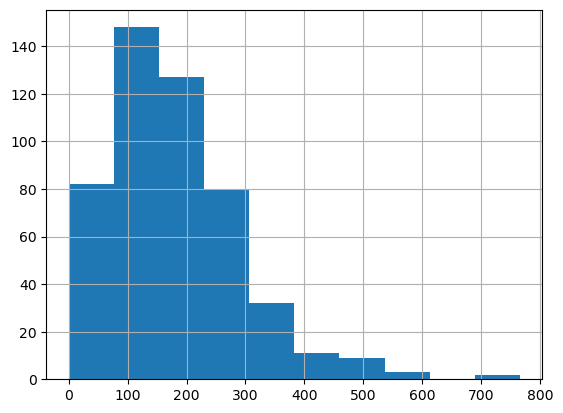

In [6]:
df['total_rainfall'].hist()

<Axes: >

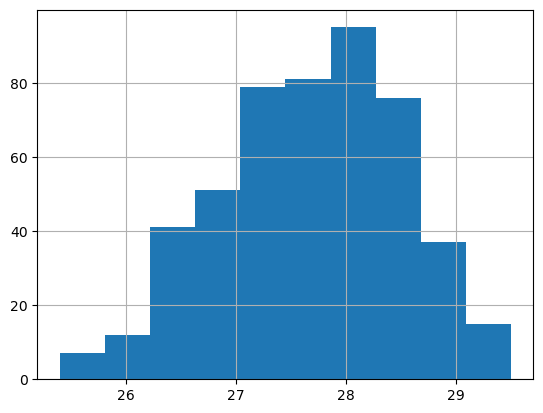

In [7]:
df['mean_temp'].hist()

## Monthly trends

<Axes: xlabel='month'>

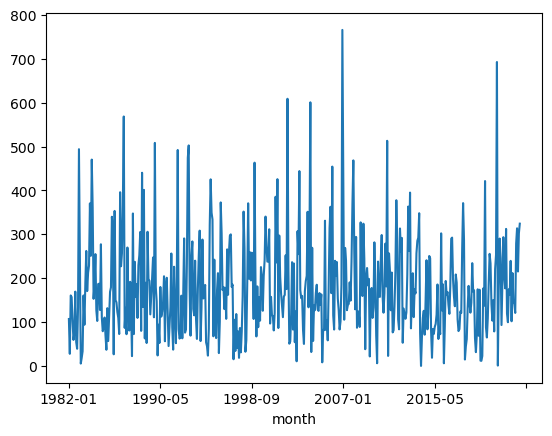

In [8]:
df['total_rainfall'].plot()

<Axes: xlabel='month'>

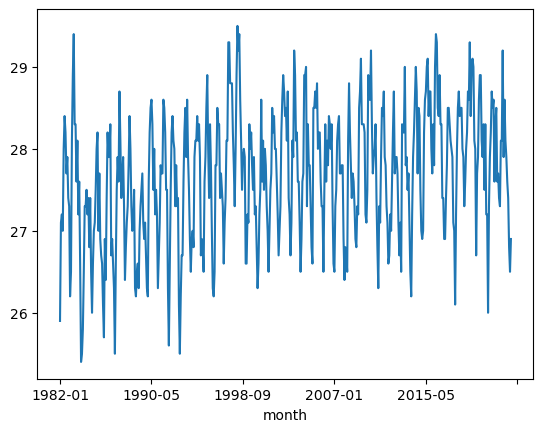

In [9]:
df['mean_temp'].plot()

## Yearly trends

In [10]:
year = df.index.str[:4]
df_year = df.groupby(year).mean()
df_year.index.rename('year', inplace=True)
df_year = df_year.drop('2023')
years = pd.Series(df_year.index).astype('int')

<Axes: xlabel='year', ylabel='mean_temp'>

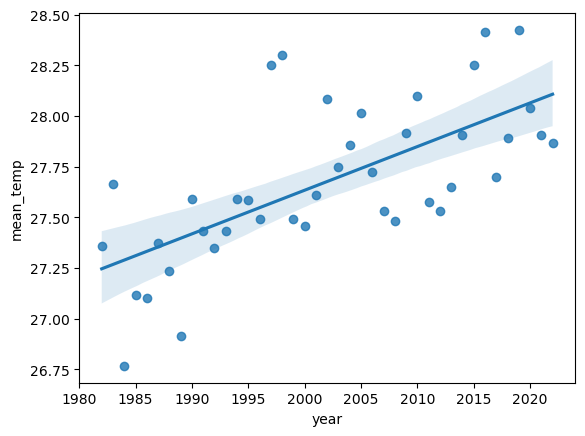

In [11]:
sns.regplot(data=df_year, x=years, y='mean_temp')

<Axes: xlabel='year', ylabel='total_rainfall'>

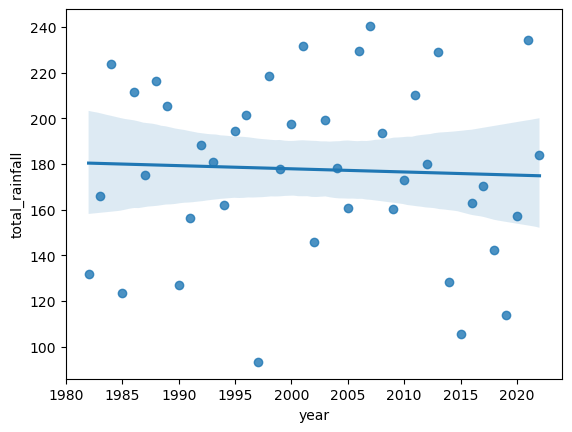

In [12]:
sns.regplot(data=df_year, x=years, y='total_rainfall')

## Relationship between temperature and rainfall

CPU times: total: 234 ms
Wall time: 108 ms


<Axes: xlabel='mean_temp', ylabel='total_rainfall'>

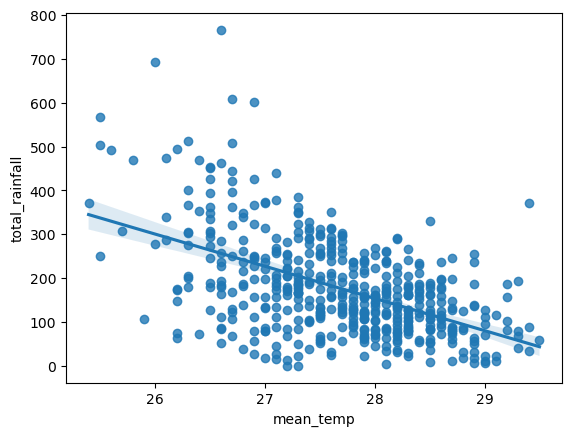

In [13]:
%%time
sns.regplot(data=df, x='mean_temp', y='total_rainfall')

# Conclusions

The mean temperature has been increasing over the years, but not the rainfall.

As the mean temperature increases, total rainfall decreases.